In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df1 = pd.read_csv('german_credit_data.csv')
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df1 = df1.iloc[:,1:]

In [ ]:
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df1.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df1.columns = ['Age','Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account', 'Credict_amount', 'Duration', 'Purpose', 'Risk']

In [ ]:
df1.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credict_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credict_amount    1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
#Takig care of NaN values by pandas
df1 = df1.fillna(df1.mode().iloc[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   1000 non-null   object
 5   Checking_account  1000 non-null   object
 6   Credict_amount    1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df1.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credict_amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1].values
X.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credict_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
#label encdoing
from sklearn.preprocessing import LabelEncoder
L3 = LabelEncoder()

In [ ]:
y = L3.fit_transform(y)
to_encode = ["Housing","Sex", "Purpose", "Saving_accounts", "Checking_account"]

encoders={}
def encode(df,col_name):
    encoder = LabelEncoder().fit(df[col_name])
    encoded_data = encoder.transform(df[col_name])
    return encoder, encoded_data

for col in to_encode:
    a,b = encode(df1,col)
    X[col] = b
    encoders[col]=a

X.head()
#le_sex.classes_
#print(encoders[2].classes_)
#print(list(le_sex.classes_))

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credict_amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [ ]:
X = X.iloc[:,:].values
X

array([[  67,    1,    2, ..., 1169,    6,    5],
       [  22,    0,    2, ..., 5951,   48,    5],
       [  49,    1,    1, ..., 2096,   12,    3],
       ...,
       [  38,    1,    2, ...,  804,   12,    5],
       [  23,    1,    2, ..., 1845,   45,    5],
       [  27,    1,    2, ..., 4576,   45,    1]])

In [ ]:
#train, test split
from sklearn.model_selection import train_test_split
#basic split
X_train_all, X_test, y_train_all, y_test = train_test_split(X,y, test_size = 0.3)
#validation split
X_train, X_validate, y_train, y_validate = train_test_split(X_train_all,y_train_all, test_size = 0.25)

In [ ]:
#metrics
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

def model_metrics_summary(y_test, y_pred):
    #Accuracy
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    #R2
    print("R2:", metrics.r2_score(y_test, y_pred))
    #F1
    print("F1:", metrics.f1_score(y_test, y_pred))
    # Recall
    print("Recall:",metrics.recall_score(y_test, y_pred))
    # Precision
    print("Precision:",metrics.precision_score(y_test, y_pred))

    #Confusion Matrix
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    # Ticket labels
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    return metrics.f1_score(y_test, y_pred)


In [ ]:
predicted_values = pd.DataFrame(y_test)

Accuracy: 0.7033333333333334
R2: -0.36335784313725483
F1: 0.8118393234672305
Recall: 0.9411764705882353
Precision: 0.7137546468401487


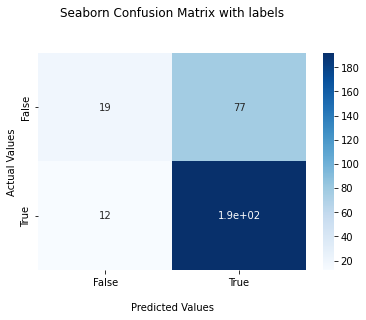

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state =0)
log_clf.fit(X_train,y_train)
y_pred_lr = log_clf.predict(X_test)

f1_lr = model_metrics_summary(y_test, y_pred_lr)

In [ ]:
predicted_values['Logistic_Regression'] = y_pred_lr

Accuracy: 0.6666666666666666
R2: -0.5318627450980391
F1: 0.7975708502024291
Recall: 0.9656862745098039
Precision: 0.6793103448275862


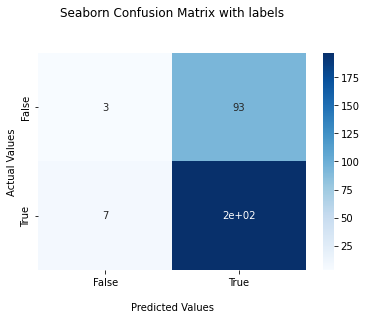

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 23)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

f1_knn = model_metrics_summary(y_test, y_pred_knn)

In [ ]:
predicted_values['KNN'] = y_pred_knn

Accuracy: 0.7
R2: -0.3786764705882353
F1: 0.8026315789473685
Recall: 0.8970588235294118
Precision: 0.7261904761904762


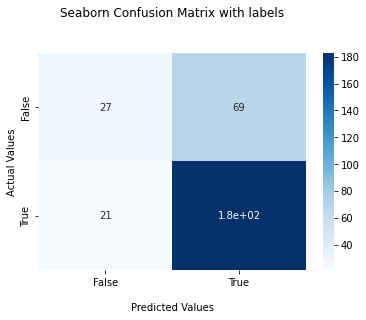

In [ ]:
#SVM
from sklearn.svm import SVC
SVM_clf_1 = SVC(kernel = 'linear')
SVM_clf_1.fit(X_train, y_train)
y_pred_svm = SVM_clf_1.predict(X_test)

f1_svm = model_metrics_summary(y_test, y_pred_svm)

In [ ]:
predicted_values['SVM'] = y_pred_svm

Accuracy: 0.68
R2: -0.47058823529411753
F1: 0.7876106194690267
Recall: 0.8725490196078431
Precision: 0.717741935483871


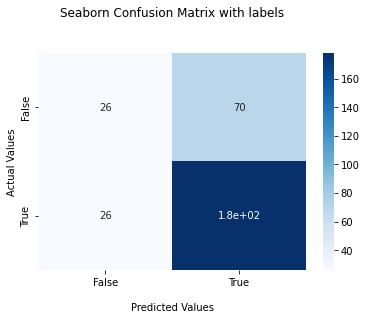

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Classifier_RF = RandomForestClassifier(n_estimators=140,criterion = 'entropy')
Classifier_RF.fit(X_train, y_train)
y_pred_rf = Classifier_RF.predict(X_test)
f1_rf = model_metrics_summary(y_test, y_pred_rf)

In [ ]:
predicted_values['Random_Forest'] = y_pred_rf

Accuracy: 0.6166666666666667
R2: -0.7616421568627452
F1: 0.7228915662650603
Recall: 0.7352941176470589
Precision: 0.7109004739336493


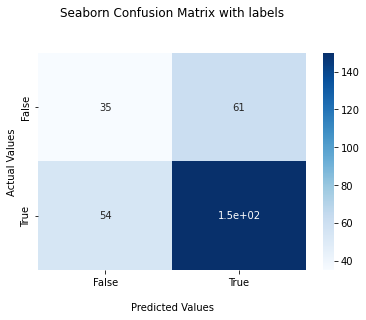

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier_DT = DecisionTreeClassifier(criterion='entropy')
classifier_DT.fit(X_train,y_train)
y_pred_dt = classifier_DT.predict(X_test)

f1_dt = model_metrics_summary(y_test, y_pred_dt)

Accuracy: 0.6666666666666666
R2: -0.5318627450980391
F1: 0.7747747747747747
Recall: 0.8431372549019608
Precision: 0.7166666666666667


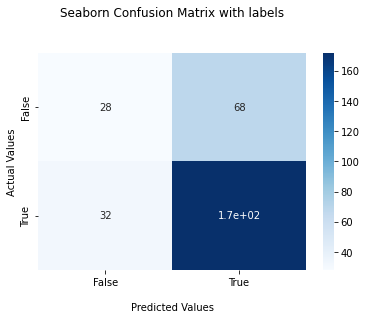

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)
f1_rf = model_metrics_summary(y_test, y_pred_NB)

In [ ]:
predicted_values['Decision_Tree'] = y_pred_dt

Accuracy: 0.65
R2: -0.6084558823529411
F1: 0.761904761904762
Recall: 0.8235294117647058
Precision: 0.7088607594936709


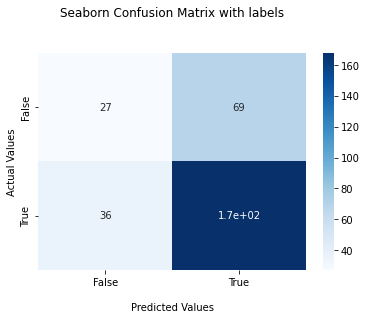

In [ ]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train, y_train)
y_pred_qda = clf_qda.predict(X_test)

f1_qda = model_metrics_summary(y_test, y_pred_qda)

In [ ]:
predicted_values['QDA'] = y_pred_qda

Accuracy: 0.68
R2: -0.47058823529411753
F1: 0.791304347826087
Recall: 0.8921568627450981
Precision: 0.7109375


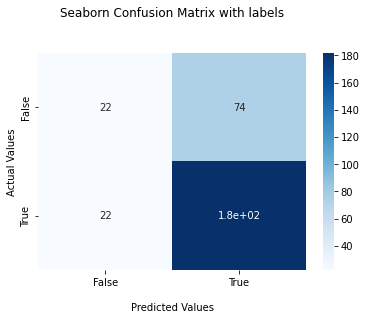

In [ ]:
#Gradient Boosting
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)

f1_gb = model_metrics_summary(y_test, y_pred_gb)

In [ ]:
predicted_values['Gradient_Boosting'] = y_pred_gb

In [ ]:
predicted_values

,0,Logistic_Regression,KNN,SVM,Random_Forest,Decision_Tree,QDA,Gradient_Boosting
0,1,1,1,0,0,1,1,0
1,1,1,1,1,1,0,1,1
2,0,1,1,1,1,1,1,1
3,0,0,1,0,0,0,1,1
4,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1
298,0,1,1,1,1,1,1,1


In [ ]:
estimators = [
    ('LR', LogisticRegression(random_state = 0)),
    ('KNN', KNeighborsClassifier(n_neighbors = 23)),
    ('SVM', SVC(kernel = 'linear')),
    ('RF', RandomForestClassifier(n_estimators=140,criterion = 'entropy')),
    ('DT', DecisionTreeClassifier(criterion='entropy')),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('NB', GaussianNB())
    
    #('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
]

In [ ]:
print(f1_dt)
print(f1_knn)
print(f1_svm)
print(f1_qda)
print(f1_rf)
print(f1_gb)
print(f1_lr)

0.7228915662650603
0.7975708502024291
0.8026315789473685
0.761904761904762
0.7747747747747747
0.791304347826087
0.8118393234672305


In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(
    estimators = estimators, final_estimator = SVC())

clf.fit(X_validate, y_validate).score(X_test, y_test)


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

0.68

In [ ]:
final_prediction = clf.predict(X_test)
final_prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Model export

In [ ]:
import pickle

filename = 'model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
X_test[20]

array([  35,    1,    2,    1,    0,    0, 1979,   15,    5])

In [ ]:
# def get_value_names(df, column):
#     return df[column].value_counts().index

# for item in ["Sex", "Purpose", "Saving_accounts", "Checking_account"]:
#     print(get_value_names(df1, item),"\n\n")

# X.Sex = L3.fit_transform(X.Sex)
# X.Housing = L3.fit_transform(X.Housing)
# X.Purpose = L3.fit_transform(X.Purpose)
# X.Saving_accounts = L3.fit_transform(X.Saving_accounts)
# X.Checking_account = L3.fit_transform(X.Checking_account)
# y = L3.fit_transform(y)
# X

In [ ]:
# sample = ['22', 'male', '1 - unskilled and resident', 'own', 'little', 'moderate', '2000', '12', 'business']

# sample = np.array(sample)
# sample.shape
# encoders


In [ ]:
# encoders["Sex"].transform([sample[1]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6477aea1-ef42-4c18-8df6-e762bd995b06' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>